# Optimization Test Problems

## Six hump camel function

In [7]:
# Import necessary librariies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Define the Six hump camel function
def six_hump_camel_func(x1, x2):
    return (4 - 2.1 * x1**2 + (x1**4) / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

In [8]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1, x2)

In [9]:
# Generate values of the 3rd axis
y = six_hump_camel_func(x1, x2)

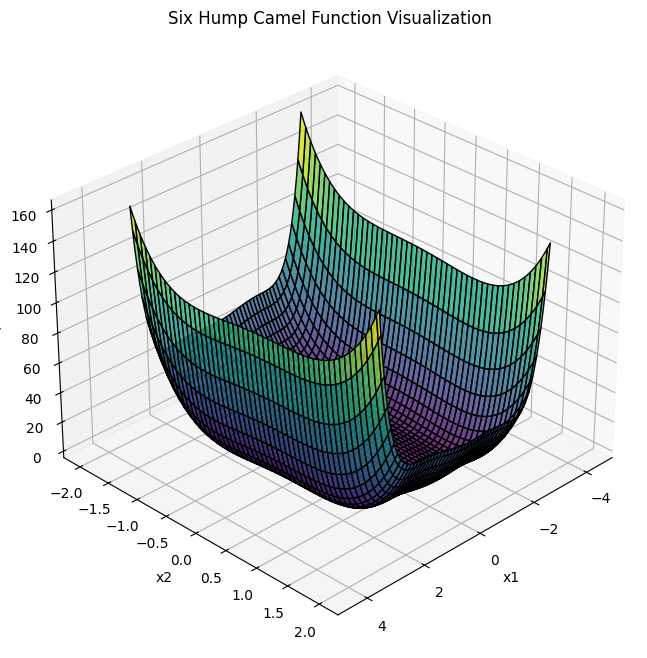

In [10]:
# Visualize six hump camel function
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, x2, y, cmap="viridis", edgecolor="k", alpha=0.8)
ax.set_title("Six Hump Camel Function Visualization")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_xlim([-5, 5])
ax.view_init(elev=30, azim=45)
plt.show()

#### Define a function to handle visualizing functions

In [11]:
def visualize_func(x1, x2, y, func_name=""):
    # plot 3d graph of function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y, cmap="viridis", edgecolor="k", alpha=0.8)
    ax.set_title(f"{func_name} Function Visualization")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.view_init(elev=30, azim=45)
    plt.show()

## Michalewicz function

In [12]:
# Define the Michalewicz function
def michalewicz_func(x, m=10):
    y = 0
    d = len(x)
    for i in range(d):
        y -= np.sin(x[i]) * (np.sin((i + 1) * x[i] ** 2 / np.pi) ** (2 * m))
    return y

In [13]:
test = np.array([2.20, 1.57])  # test function
michalewicz_func(test)

np.float64(-1.801140718473825)

In [14]:
m1 = np.linspace(0, np.pi, 100)
m2 = np.linspace(0, np.pi, 100)
m1, m2 = np.meshgrid(m1, m2)

# Evaluate the function at each point on the grid
y = np.array(
    [
        [michalewicz_func([m1, m2]) for m1, m2 in zip(row1, row2)]
        for row1, row2 in zip(m1, m2)
    ]
)

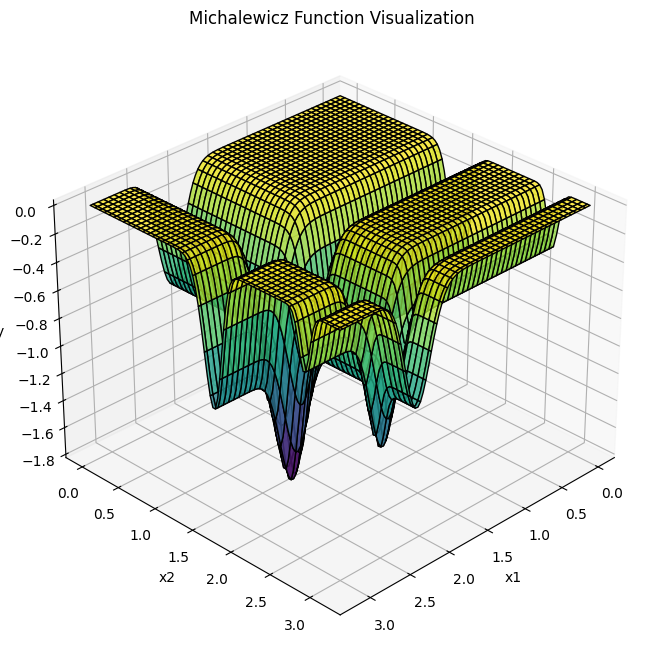

In [15]:
# Visualize Michalewicz function
visualize_func(m1, m2, y, func_name="Michalewicz")

## Ackley Function

In [16]:
# Define ackley function
def ackley_func(x1, x2, a=20, b=0.2, c=2 * np.pi):
    sum1 = x1**2 + x2**2
    sum2 = np.cos(c * x1) + np.cos(c * x2)
    term1 = -a * np.exp(-b * np.sqrt(sum1 / 2))
    term2 = -np.exp(sum2 / 2)
    return term1 + term2 + a + np.exp(1)

In [17]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-32.768, 32.768, 100)
x2 = np.linspace(-32.768, 32.768, 100)
x1, x2 = np.meshgrid(x1, x2)
y = ackley_func(x1, x2)

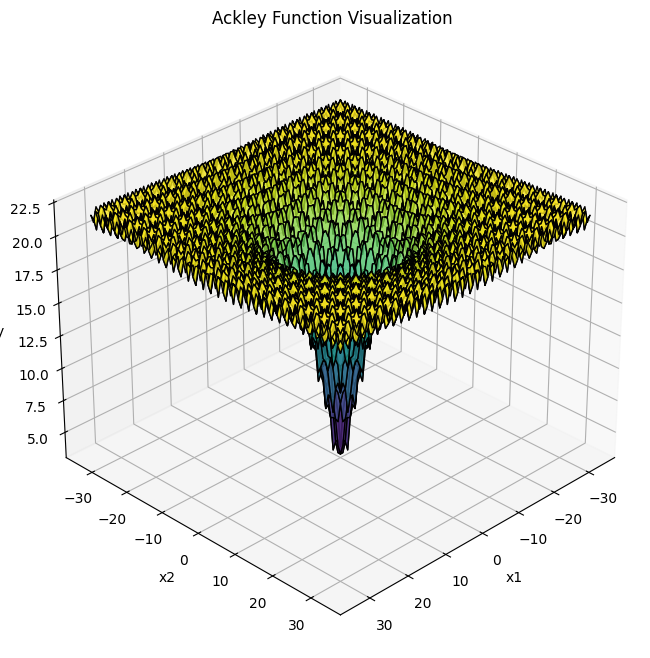

In [18]:
# Visualize Ackley function
visualize_func(x1, x2, y, func_name="Ackley")

## Trid Function

In [19]:
# Define the Trid function
def trid_func(x1, x2):
    term1 = (x1 - 1)**2 + (x2 - 1)**2
    term2 = x1 * x2
    return term1 - term2

In [20]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
x1, x2 = np.meshgrid(x1, x2)
y = trid_func(x1, x2)

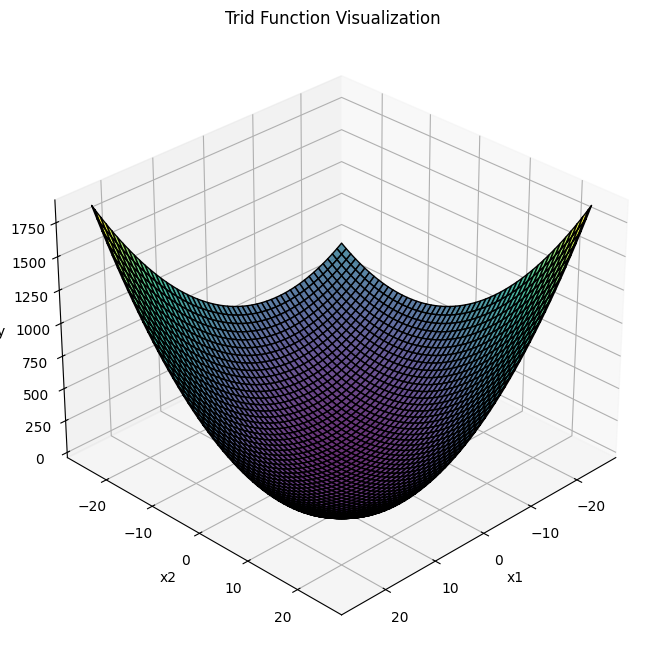

In [21]:
# Visualize Trid function
visualize_func(x1, x2, y, func_name="Trid")

## Explaining the problem to myself

#### 1. Function: 

Given a function  $f(x, y)$ , your goal is to minimize it using gradient descent. This means finding the point $(\hat x, \hat y)$ where the gradient of $f(x, y)$  is zero (or close).

#### 2. Gradient Descent

The gradient of  f(x, y)  is a vector containing the partial derivatives:

$\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$

At each step of gradient descent, you need to update both x and y based on the gradient:

$x_{\text{new}} = x - \eta \frac{\partial f}{\partial x}$


$y_{\text{new}} = y - \eta \frac{\partial f}{\partial y}$


In [2]:
# Define the Six hump camel function
def six_hump_camel_func(x1, x2):
    return (4 - 2.1 * x1**2 + (x1**4) / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

In [4]:
six_hump_camel_func(0.1,0.2)

-0.09380966666666667

## Stochastic Gradient Descent (SGD) - `tf.GradientTape`

In [43]:
def sgd_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    pred_1 = test_func(w1, w2)
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        w1.assign_sub(learning_rate * df_dw1)
        w2.assign_sub(learning_rate * df_dw2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(pred_1)}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return w1, w2, test_func(w1, w2), t

In [44]:
sgd_tape(six_hump_camel_func)

Iter 100th - x1 = 0.034463778138160706, x2 = 0.20409682393074036, y = -0.147899329662323
Iter 200th - x1 = -0.005492541939020157, x2 = 0.39182621240615845, y = -0.5218594670295715
Iter 300th - x1 = -0.03753552958369255, x2 = 0.5881302356719971, y = -0.9214534759521484
Iter 400th - x1 = -0.06165507435798645, x2 = 0.6805342435836792, y = -1.021344780921936
Iter 500th - x1 = -0.07593628019094467, x2 = 0.705193281173706, y = -1.0305250883102417
Iter 600th - x1 = -0.08324162662029266, x2 = 0.7107627987861633, y = -1.0314416885375977
Iter 700th - x1 = -0.08675746619701385, x2 = 0.7120847105979919, y = -1.031590461730957
Iter 800th - x1 = -0.08840948343276978, x2 = 0.7124502658843994, y = -1.0316203832626343
Converged on 813th iteration

x1: -0.08854573220014572, x2: 0.7124740481376648
At x1 & x2, y = -1.0316218137741089


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.08854573220014572>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7124740481376648>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0316218137741089>,
 813)

## Vanilla Momentum Optimizer - `tf.GradientTape`

In [45]:
def momentum_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(pred_1)}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return w1, w2, test_func(w1, w2), t

In [46]:
momentum_tape(six_hump_camel_func)

Iter 100th - x1 = -0.0907864049077034, x2 = 0.7105706334114075, y = -1.0315874814987183
Converged on 154th iteration

x1: -0.0899130329489708, x2: 0.7126482129096985
At x1 & x2, y = -1.0316283702850342


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.0899130329489708>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7126482129096985>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0316283702850342>,
 154)

## Nesterov Accelerated Gradient Optimizer - `tf.GradientTape`

In [ ]:
def nesterov_acc_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1 + beta * m1, w2 + beta * m2) # evaluate ahead
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update momentums
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        # update weights
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(pred_1)}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return w1, w2, test_func(w1, w2), t

In [54]:
nesterov_acc_tape(six_hump_camel_func)

Iter 100th - x1 = -0.09091490507125854, x2 = 0.7108205556869507, y = -1.0315945148468018
Converged on 132th iteration

x1: -0.0895344540476799, x2: 0.7125177383422852
At x1 & x2, y = -1.0316280126571655


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.0895344540476799>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7125177383422852>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0316280126571655>,
 132)

## Adaptive Gradient Moment (AdaGrad)

In [ ]:
def adagrad_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign_add(df_dw1 * df_dw1)
        s2.assign_add(df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(pred_1)}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return w1, w2, test_func(w1, w2), t

In [57]:
adagrad_tape(six_hump_camel_func, max_iters=1000000)

Iter 100th - x1 = 0.08191104978322983, x2 = 0.1193164512515068, y = -0.019618380814790726
Iter 200th - x1 = 0.07418226450681686, x2 = 0.12828503549098969, y = -0.033279899507761
Iter 300th - x1 = 0.06838737428188324, x2 = 0.1352994292974472, y = -0.04396910220384598
Iter 400th - x1 = 0.06359896063804626, x2 = 0.14129137992858887, y = -0.05312792584300041
Iter 500th - x1 = 0.05945664644241333, x2 = 0.14662428200244904, y = -0.061314016580581665
Iter 600th - x1 = 0.05577510595321655, x2 = 0.15148554742336273, y = -0.06881280988454819
Iter 700th - x1 = 0.05244407057762146, x2 = 0.15598684549331665, y = -0.07579319179058075
Iter 800th - x1 = 0.04939156398177147, x2 = 0.16020138561725616, y = -0.08236505836248398
Iter 900th - x1 = 0.04656750708818436, x2 = 0.16418012976646423, y = -0.08860442787408829
Iter 1000th - x1 = 0.043935321271419525, x2 = 0.16796033084392548, y = -0.09456650167703629
Iter 1100th - x1 = 0.04146738722920418, x2 = 0.17157018184661865, y = -0.10029277950525284
Iter 1200

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.08666618168354034>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6910985708236694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0279650688171387>,
 108384)

## Root Mean Square Propagation (RMSProp)

In [58]:
def rmsprop_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # decay rate
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign(beta * s1 + (1 - beta) * df_dw1 * df_dw1)
        s2.assign(beta * s2 + (1 - beta) * df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(pred_1)}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return w1, w2, test_func(w1, w2), t

In [59]:
rmsprop_tape(six_hump_camel_func)

Iter 100th - x1 = 0.0013229710748419166, x2 = 0.21520058810710907, y = -0.17637452483177185
Iter 200th - x1 = -0.03973238542675972, x2 = 0.3179374039173126, y = -0.3697877526283264
Iter 300th - x1 = -0.052910204976797104, x2 = 0.41875123977661133, y = -0.5893909931182861
Iter 400th - x1 = -0.06545598059892654, x2 = 0.5179039239883423, y = -0.8019208908081055
Iter 500th - x1 = -0.0777055099606514, x2 = 0.6143149733543396, y = -0.9635197520256042
Iter 600th - x1 = -0.08865158259868622, x2 = 0.6998263597488403, y = -1.0303142070770264
Converged on 637th iteration

x1: -0.08932711184024811, x2: 0.7125625610351562
At x1 & x2, y = -1.0316274166107178


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.08932711184024811>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7125625610351562>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0316274166107178>,
 637)

## Adaptive Moment Estimation (Adam)